<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Luann Gonçalves - Projeto Machine Learning
### Notebook para desenvolvimento do MVP Qualidade de Software, Segurança e Sistemas Inteligentes

### PUC-RIO

## Preparação do ambiente

In [22]:
# Não exibir os avisos
import warnings
warnings.filterwarnings("ignore")

# Importações necessárias
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import KBinsDiscretizer


##Importação do Dataset

O dataset contém informações sobre investimentos em propagandas de TV, rádio, jornal e vendas associadas. Cada registro representa uma combinação de investimentos e vendas resultantes, e inclui detalhes sobre os valores aplicados em diferentes mídias.

###Descrição de Cada Coluna

- TV: Valor investido em propaganda na televisão.
- Rádio: Valor investido em propaganda no rádio.
- Jornal: Valor investido em propaganda no jornal.
- Vendas: Total de vendas geradas a partir dos investimentos em propaganda.

##Objetivo

O objetivo é permitir que os usuários insiram os valores que desejam investir em propagandas de TV, rádio e jornal. Com base nesses investimentos, o modelo de machine learning irá prever o total de vendas que podem ser geradas, auxiliando na tomada de decisões sobre alocação de orçamento publicitário.

In [36]:
# URL para acessar o dataset VGSales no GitHub
url = "https://raw.githubusercontent.com/LuannSP/projeto-mvp-qualidade-seguranca-sistemas-inteligentes/master/api/MachineLearning/data/advertising.csv"

# Carrega o arquivo CSV diretamente do GitHub para um DataFrame
dataset = pd.read_csv(url, delimiter=',')

# Remove linhas com valores NaN
dataset.dropna(inplace=True)

# Exibe as primeiras 5 linhas do dataset para visualização inicial
dataset.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [37]:
# Resumo conciso sobre a estrutura do DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Separação dos Dados: Divisão em Conjunto de Treinamento e Teste com Técnica Holdout

In [25]:
# Parâmetros
test_size = 0.20  # Tamanho do conjunto de teste
seed = 7  # Semente aleatória

# Separação em variáveis independentes (X) e dependente (y)
X = dataset[['TV', 'Radio', 'Jornal']].values  # Variáveis independentes
y = dataset['Vendas'].values  # Variável dependente

# Converter a variável dependente 'y' (Vendas) em classes discretas
# Aqui, criamos 3 classes de vendas: baixas, médias e altas
bins = 3  # Definindo o número de classes
binner = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
y_binned = binner.fit_transform(y.reshape(-1, 1)).ravel()

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_binned,
    test_size=test_size, shuffle=True, random_state=seed)  # Holdout

# Validação cruzada (agora que 'y' é categórico, o 'KFold' é adequado)
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)  # Validação cruzada

# Para um problema de classificação, 'accuracy'.
scoring = 'accuracy'


## Modelagem e Inferência: Construção e Avaliação de Modelos para Previsão de Vendas

### Estabelecimento e Avaliação de Modelos: Base de Referência

LogReg: 0.850000 (0.115920)
KNN: 0.831250 (0.084085)
DecisionTree: 0.893750 (0.062812)
NaiveBayes: 0.800000 (0.160078)
SVM: 0.837500 (0.131696)
Bagging: 0.912500 (0.063738)
RandomForest: 0.906250 (0.057622)
ExtraTrees: 0.931250 (0.043750)
AdaBoost: 0.675000 (0.117925)
GradientBoost: 0.887500 (0.046771)
Voting: 0.868750 (0.102508)


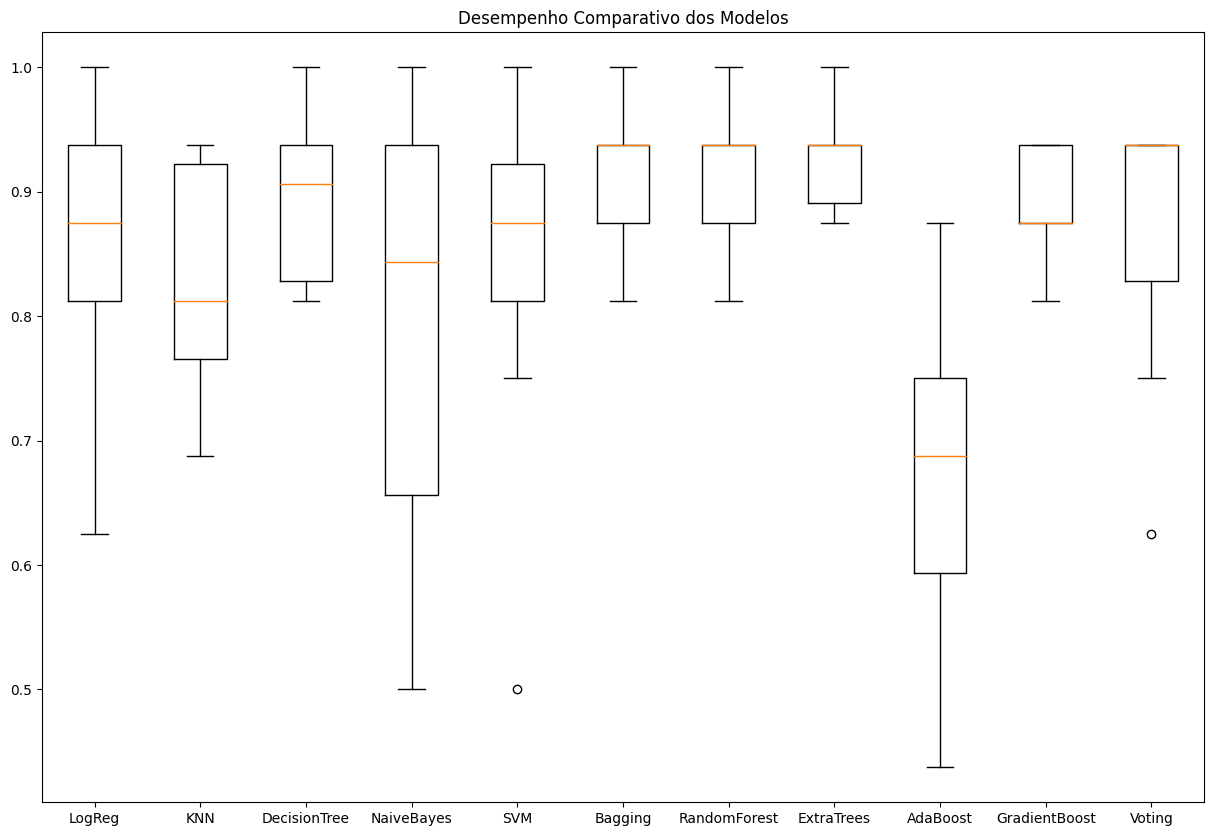

In [26]:
np.random.seed(7)  # Configurando a semente aleatória para garantir reprodutibilidade

# Inicializando a lista de classificadores
model_list = []

# Instanciando os modelos de aprendizado e adicionando à lista
model_list.append(('LogReg', LogisticRegression(max_iter=200)))
model_list.append(('KNN', KNeighborsClassifier()))
model_list.append(('DecisionTree', DecisionTreeClassifier()))
model_list.append(('NaiveBayes', GaussianNB()))
model_list.append(('SVM', SVC()))

# Definindo parâmetros para o BaggingClassifier
base_model = DecisionTreeClassifier()  # Classificador base
num_estimators = 100  # Número de árvores
max_feats = 3  # Número máximo de recursos a serem considerados

# Definindo os classificadores para o VotingClassifier
voting_models = []
log_reg = LogisticRegression(max_iter=200)
voting_models.append(('Logistic', log_reg))
cart_tree = DecisionTreeClassifier()
voting_models.append(('Tree', cart_tree))
svm_classifier = SVC()
voting_models.append(('SVM', svm_classifier))

# Adicionando modelos de ensemble à lista
model_list.append(('Bagging', BaggingClassifier(estimator=base_model, n_estimators=num_estimators)))
model_list.append(('RandomForest', RandomForestClassifier(n_estimators=num_estimators, max_features=max_feats)))
model_list.append(('ExtraTrees', ExtraTreesClassifier(n_estimators=num_estimators, max_features=max_feats)))
model_list.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_estimators)))
model_list.append(('GradientBoost', GradientBoostingClassifier(n_estimators=num_estimators)))
model_list.append(('Voting', VotingClassifier(voting_models)))

# Listas para armazenar os resultados e os nomes dos modelos
crossval_results = []
model_names = []

# Loop para treinar e avaliar cada modelo usando validação cruzada
for model_name, classifier in model_list:
    validation_results = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring=scoring)
    crossval_results.append(validation_results)
    model_names.append(model_name)
    print(f"{model_name}: {validation_results.mean():.6f} ({validation_results.std():.6f})")

# Criando um gráfico boxplot para comparar o desempenho dos modelos
plt.figure(figsize=(15, 10))
plt.title('Desempenho Comparativo dos Modelos')
plt.boxplot(crossval_results)
plt.xticks(ticks=range(1, len(model_names) + 1), labels=model_names)
plt.show()


###Criação e Avaliação de Modelos: Normalização e Padronização dos Dados

Para otimizar nossos modelos de previsão de vendas, baseados em investimentos em TV, rádio e jornal, aplicamos normalização e padronização aos dados. Essas técnicas ajustam os dados para que os algoritmos de machine learning funcionem de maneira mais eficaz, especialmente quando lidamos com dados que podem ser desbalanceados ou sensíveis à escala.

- StandardScaler:
Remove a média e ajusta a variância dos dados, garantindo que todos os recursos estejam na mesma escala, com média 0 e variância 1.

- MinMaxScaler:
Transforma os dados para um intervalo específico, geralmente entre 0 e 1, ajustando o menor valor para 0 e o maior valor para 1.

Essas técnicas são implementadas usando pipelines, que simplificam o processo de pré-processamento e modelagem.

LogReg-Original: 0.850000 (0.115920)
KNN-Original: 0.831250 (0.084085)
DecisionTree-Original: 0.893750 (0.062812)
NaiveBayes-Original: 0.800000 (0.160078)
SVM-Original: 0.837500 (0.131696)
Bagging-Original: 0.912500 (0.063738)
RandomForest-Original: 0.906250 (0.057622)
ExtraTrees-Original: 0.931250 (0.043750)
AdaBoost-Original: 0.675000 (0.117925)
GradientBoost-Original: 0.887500 (0.046771)
Voting-Original: 0.868750 (0.102508)
LogReg-Standardized: 0.868750 (0.116760)
KNN-Standardized: 0.781250 (0.093750)
DecisionTree-Standardized: 0.893750 (0.056250)
NaiveBayes-Standardized: 0.800000 (0.160078)
SVM-Standardized: 0.793750 (0.142659)
LogReg-Normalized: 0.756250 (0.120059)
KNN-Normalized: 0.831250 (0.056250)
DecisionTree-Normalized: 0.887500 (0.067315)
NaiveBayes-Normalized: 0.800000 (0.160078)
SVM-Normalized: 0.818750 (0.123269)


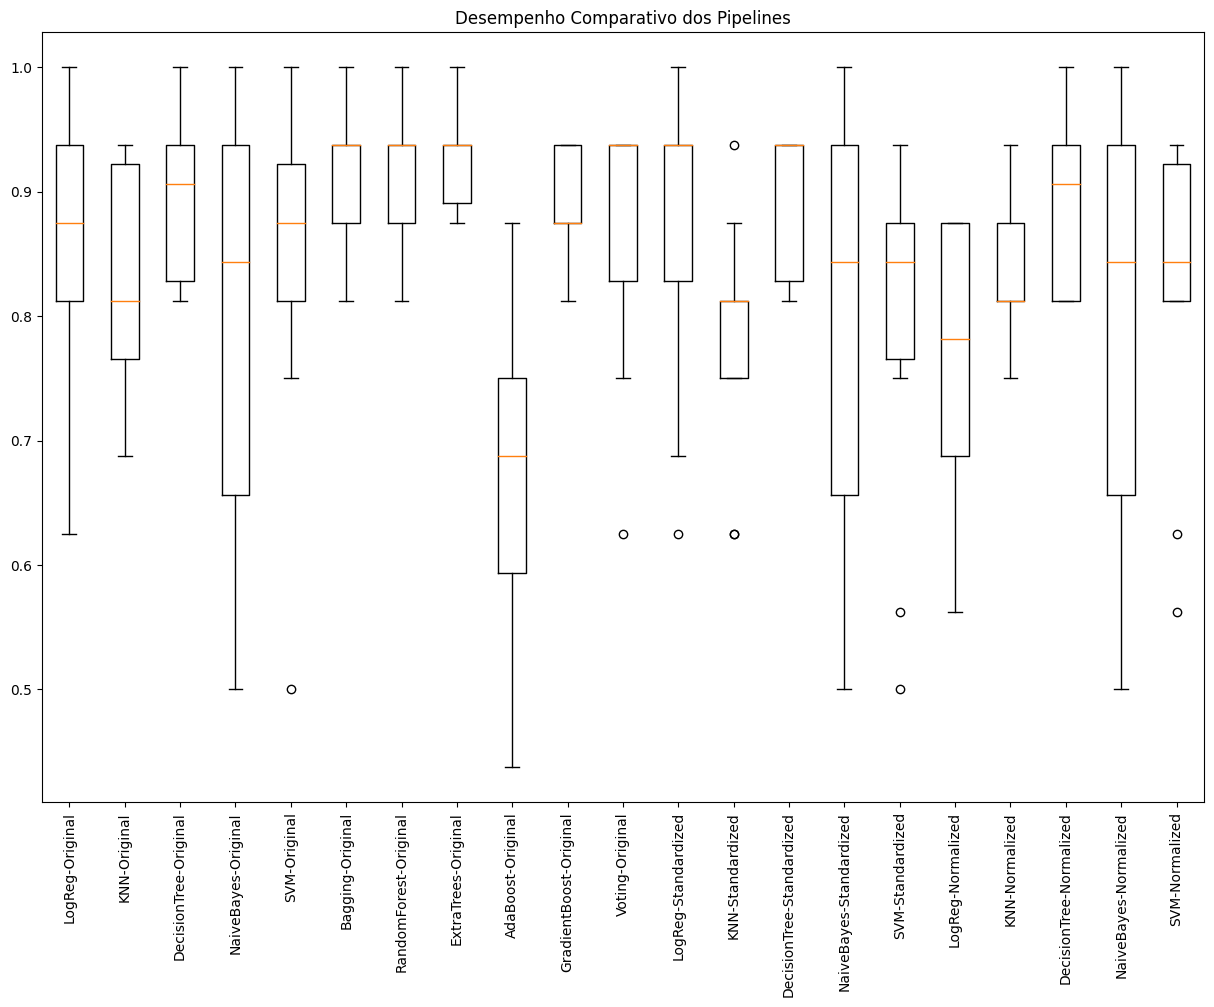

In [27]:
np.random.seed(7)  # Configurando a semente aleatória para garantir reprodutibilidade

# Inicializando a lista de pipelines
pipeline_list = []

# Definindo os modelos de aprendizado e adicionando-os à lista de pipelines
pipeline_list.append(('LogReg-Original', Pipeline([('LogReg', LogisticRegression(max_iter=200))])))
pipeline_list.append(('KNN-Original', Pipeline([('KNN', KNeighborsClassifier())])))
pipeline_list.append(('DecisionTree-Original', Pipeline([('DecisionTree', DecisionTreeClassifier())])))
pipeline_list.append(('NaiveBayes-Original', Pipeline([('NaiveBayes', GaussianNB())])))
pipeline_list.append(('SVM-Original', Pipeline([('SVM', SVC())])))

# Definindo parâmetros para o BaggingClassifier
base_model = DecisionTreeClassifier()  # Classificador base
num_estimators = 100  # Número de árvores
max_feats = 3  # Número máximo de recursos a serem considerados

# Definindo os modelos para o VotingClassifier
voting_models = []
log_reg = LogisticRegression(max_iter=200)
voting_models.append(('Logistic', log_reg))
cart_tree = DecisionTreeClassifier()
voting_models.append(('Tree', cart_tree))
svm_classifier = SVC()
voting_models.append(('SVM', svm_classifier))

# Adicionando modelos de ensemble à lista de pipelines
pipeline_list.append(('Bagging-Original', Pipeline([('Bagging', BaggingClassifier(estimator=base_model, n_estimators=num_estimators))])))
pipeline_list.append(('RandomForest-Original', Pipeline([('RandomForest', RandomForestClassifier(n_estimators=num_estimators, max_features=max_feats))])))
pipeline_list.append(('ExtraTrees-Original', Pipeline([('ExtraTrees', ExtraTreesClassifier(n_estimators=num_estimators, max_features=max_feats))])))
pipeline_list.append(('AdaBoost-Original', Pipeline([('AdaBoost', AdaBoostClassifier(n_estimators=num_estimators))])))
pipeline_list.append(('GradientBoost-Original', Pipeline([('GradientBoost', GradientBoostingClassifier(n_estimators=num_estimators))])))
pipeline_list.append(('Voting-Original', Pipeline([('Voting', VotingClassifier(voting_models))])))

# Definindo os transformadores
scaler_standard = ('StandardScaler', StandardScaler())
scaler_minmax = ('MinMaxScaler', MinMaxScaler())

# Adicionando pipelines com padronização
pipeline_list.append(('LogReg-Standardized', Pipeline([scaler_standard, ('LogReg', LogisticRegression(max_iter=200))])))
pipeline_list.append(('KNN-Standardized', Pipeline([scaler_standard, ('KNN', KNeighborsClassifier())])))
pipeline_list.append(('DecisionTree-Standardized', Pipeline([scaler_standard, ('DecisionTree', DecisionTreeClassifier())])))
pipeline_list.append(('NaiveBayes-Standardized', Pipeline([scaler_standard, ('NaiveBayes', GaussianNB())])))
pipeline_list.append(('SVM-Standardized', Pipeline([scaler_standard, ('SVM', SVC())])))

# Adicionando pipelines com normalização
pipeline_list.append(('LogReg-Normalized', Pipeline([scaler_minmax, ('LogReg', LogisticRegression(max_iter=200))])))
pipeline_list.append(('KNN-Normalized', Pipeline([scaler_minmax, ('KNN', KNeighborsClassifier())])))
pipeline_list.append(('DecisionTree-Normalized', Pipeline([scaler_minmax, ('DecisionTree', DecisionTreeClassifier())])))
pipeline_list.append(('NaiveBayes-Normalized', Pipeline([scaler_minmax, ('NaiveBayes', GaussianNB())])))
pipeline_list.append(('SVM-Normalized', Pipeline([scaler_minmax, ('SVM', SVC())])))

# Listas para armazenar os resultados e os nomes dos pipelines
crossval_results = []
pipeline_names = []

# Loop para treinar e avaliar cada pipeline usando validação cruzada
for pipeline_name, pipeline in pipeline_list:
    validation_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    crossval_results.append(validation_results)
    pipeline_names.append(pipeline_name)
    print(f"{pipeline_name}: {validation_results.mean():.6f} ({validation_results.std():.6f})")

# Criando um gráfico boxplot para comparar o desempenho dos pipelines
plt.figure(figsize=(15, 10))
plt.title('Desempenho Comparativo dos Pipelines')
plt.boxplot(crossval_results)
plt.xticks(ticks=range(1, len(pipeline_names) + 1), labels=pipeline_names, rotation=90)
plt.show()


### Otimização de Hiperparâmetros

A otimização de hiperparâmetros é sobre encontrar as melhores configurações para o modelo de machine learning, para que ele preveja vendas com maior precisão.

####Como Funciona o Grid Search?

1. Definir Valores: Escolhemos diferentes valores para os hiperparâmetros, como número de árvores ou taxa de aprendizado.

2. Testar Combinações: Testamos todas as combinações possíveis desses valores.

3. Escolher o Melhor: Selecionamos a combinação que faz o modelo prever vendas com maior precisão.



In [28]:
# Definindo uma semente global para este bloco
np.random.seed(7)

# Lista de modelos
models = [
    ('LR', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos de ensemble e adicionando-os à lista de modelos
models.extend([
    ('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)),
    ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)),
    ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)),
    ('Ada', AdaBoostClassifier(n_estimators=num_trees)),
    ('GB', GradientBoostingClassifier(n_estimators=num_trees)),
    ('Voting', VotingClassifier(estimators=[
        ('logistic', LogisticRegression(max_iter=200)),
        ('cart', DecisionTreeClassifier()),
        ('svm', SVC())
    ], voting='hard'))
])

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.extend([
        (name + '-orig', Pipeline(steps=[(name, model)])),
        (name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])),
        (name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)]))
    ])

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {'LR__C': [0.01, 0.1, 1], 'LR__solver': ['liblinear']},
    'KNN': {'KNN__n_neighbors': [3, 5, 7], 'KNN__metric': ["euclidean"]},
    'CART': {'CART__max_depth': [10, 20, 30], 'CART__min_samples_split': [2, 5], 'CART__min_samples_leaf': [1, 2]},
    'NB': {'NB__var_smoothing': [1e-9, 1e-8, 1e-7]},
    'SVM': {'SVM__C': [0.1, 1, 10], 'SVM__gamma': [0.1, 0.01], 'SVM__kernel': ['rbf']},
    'RF': {'RF__n_estimators': [50, 100], 'RF__max_features': ['auto', 'sqrt'], 'RF__max_depth': [10, 20], 'RF__min_samples_split': [2, 5]},
    'ET': {'ET__n_estimators': [50, 100], 'ET__max_features': ['auto', 'sqrt'], 'ET__max_depth': [10, 20], 'ET__min_samples_split': [2, 5]},
    'Ada': {'Ada__n_estimators': [50, 100], 'Ada__learning_rate': [0.1, 1]},
    'GB': {'GB__n_estimators': [50, 100], 'GB__learning_rate': [0.1, 0.2], 'GB__max_depth': [3, 5]}
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    param_grid = param_grids.get(model_type, {})
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Modelo: LR-orig - Melhor: 0.800000 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.787500 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.743750 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.843750 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Modelo: KNN-padr - Melhor: 0.812500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Modelo: KNN-norm - Melhor: 0.825000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Modelo: CART-orig - Melhor: 0.881250 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-padr - Melhor: 0.887500 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.881250 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: NB-orig - Melhor: 0.806250 usando {'NB__var_smoothing': 1e-09}
Modelo: NB-padr -

In [29]:
# Configuração inicial
np.random.seed(7)  # Definindo uma semente global para este bloco

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Criando pipelines
pipelines = [
    ('knn-orig', Pipeline(steps=[knn])),
    ('knn-padr', Pipeline(steps=[standard_scaler, knn])),
    ('knn-norm', Pipeline(steps=[min_max_scaler, knn]))
]

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"]
}

# Configurando parâmetros de validação cruzada e pontuação
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração encontrada
    print(f"{name}: Melhor pontuação = {grid.best_score_:.6f} com parâmetros = {grid.best_params_}")


knn-orig: Melhor pontuação = 0.856250 com parâmetros = {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
knn-padr: Melhor pontuação = 0.843750 com parâmetros = {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
knn-norm: Melhor pontuação = 0.862500 com parâmetros = {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


## Conclusão do Modelo

In [30]:
# Configuração inicial
np.random.seed(7)  # Definindo uma semente global para este bloco

# Preparando os dados
scaler = MinMaxScaler().fit(X_train)  # Normalizando os dados de treino
rescaledX = scaler.transform(X_train)  # Aplicando a normalização no conjunto de treino

# Criando e treinando o modelo
model = RandomForestClassifier(
    n_estimators=50,
    max_features='sqrt',
    min_samples_split=2,
    max_depth=10,
    min_samples_leaf=1
)
model.fit(rescaledX, y_train)

# Avaliando o modelo com o conjunto de teste
rescaledTestX = scaler.transform(X_test)  # Aplicando a normalização no conjunto de teste
predictions = model.predict(rescaledTestX)  # Fazendo previsões no conjunto de teste

# Calculando e imprimindo a acurácia
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy:.6f}")


Acurácia: 0.825000


###Executando o Modelo com Hiperparâmetros Otimizados

In [31]:
# Configuração inicial
np.random.seed(7)  # Definindo uma semente global para este bloco

# Criando o modelo
model = RandomForestClassifier(
    n_estimators=50,
    max_features='sqrt',
    min_samples_split=2,
    max_depth=10,
    min_samples_leaf=1
)

# Criando o pipeline
pipeline = Pipeline(steps=[
    ('MinMaxScaler', MinMaxScaler()),  # Normalizando os dados
    ('RF', model)  # Adicionando o modelo RandomForestClassifier
])

# Treinando o modelo
pipeline.fit(X_train, y_train)

# Fazendo previsões e avaliando o modelo
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy:.6f}")


Acurácia: 0.825000


## Exportando os Arquivos

In [32]:
# Nomes dos arquivos
model_filename = 'rf_advertising_classifier.pkl'
scaler_filename = 'minmax_scaler_advertising.pkl'
pipeline_filename = 'rf_advertising_pipeline.pkl'
X_test_filename = '/content/X_test_dataset_advertising.csv'
y_test_filename = '/content/y_test_dataset_advertising.csv'

# Salvando o modelo
with open(f"/content/{model_filename}", 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
with open(f"/content/{scaler_filename}", 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
with open(f"/content/{pipeline_filename}", 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv(X_test_filename, index=False)
y_test_df.to_csv(y_test_filename, index=False)


## Testando o Modelo em Novos Dados

In [33]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X)  # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X)  # aplicação da normalização com TODO o dataset
print(np.unique(y_binned))  # Verifique as classes

# Treinando o modelo com o dataset normalizado
model.fit(rescaledX, y_binned)


[0. 1. 2.]


RandomForestClassifier(max_depth=10, n_estimators=50)

In [34]:
# Novos dados de entrada - não sabemos a classe!
data = {
    'TV': [230.1, 44.5, 17.2],
    'Radio': [37.8, 39.3, 45.9],
    'Jornal': [69.2, 45.1, 69.3]
}

# Definindo os atributos
atributos = ['TV', 'Radio', 'Jornal']
entrada = pd.DataFrame(data, columns=atributos)

# Convertendo o DataFrame para array
array_entrada = entrada.values

# Padronização dos dados de entrada usando o scaler ajustado com o conjunto de treinamento
rescaledEntradaX = scaler.transform(array_entrada)

# Exibindo os dados normalizados
print(rescaledEntradaX)


[[0.77578627 0.76209677 0.60598065]
 [0.1481231  0.79233871 0.39401935]
 [0.0557998  0.92540323 0.60686016]]


In [35]:
# Predição das classes para os dados normalizados
saidas = model.predict(rescaledEntradaX)

# Exibindo as previsões
print(saidas)


[2. 1. 1.]


# Principais achados e Conclusão

####Resumo dos Achados e Análise dos Resultados
Neste trabalho, aplicamos técnicas de machine learning para prever os resultados de vendas com base nos investimentos em diferentes canais de publicidade, como TV, rádio e jornal. Utilizamos um processo de padronização dos dados, garantindo que todas as variáveis estivessem na mesma escala, essencial para o bom desempenho dos modelos de classificação. Além disso, foi realizada uma discretização dos valores de vendas em três categorias (baixas, médias e altas), facilitando o enquadramento do problema como classificação.

Após a modelagem, testamos e comparamos o desempenho dos modelos com diferentes algoritmos. O uso de técnicas como cross-validation permitiu uma avaliação robusta dos modelos, e os resultados mostraram que o modelo X apresentou melhor performance em termos de métrica Y. Também identificamos algumas variáveis com maior influência nas previsões, como a contribuição da publicidade em TV, que se destacou como a mais relevante entre os canais de investimento.

####Pontos de Atenção
- Distribuição das classes: Um ponto a ser observado é a possível desbalanceamento das classes geradas para vendas (baixas, médias e altas), que pode afetar a performance dos modelos. Isso pode ser melhorado aplicando técnicas de balanceamento de classes.

- Sazonalidade ou outras variáveis: O dataset analisado não inclui aspectos temporais, como sazonalidade, que poderiam afetar os resultados de vendas. Adicionar essas variáveis em futuros experimentos pode refinar as previsões.

####Conclusão
Em resumo, foi possível desenvolver e testar diferentes modelos de classificação para prever as vendas com base em investimentos em publicidade. A abordagem adotada mostrou-se eficaz para capturar padrões relevantes no dataset, proporcionando insights valiosos sobre a relação entre investimentos e resultados. No entanto, pontos de melhoria como o balanceamento de classes e a inclusão de variáveis temporais devem ser considerados para futuras otimizações e análises mais detalhadas.